In [2]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
from typing import List
import numpy.typing as npt
import tensorflow as tf
import tensorflow_model_optimization as tfmot
import Quantization
from keras.engine.functional import Functional
# plt.style.use('bmh')
OUTPUTS_DIR = "./outputs/"
LOAD_PATH_Q_AWARE = "./model/model_q_aware_final_01"
PLT_SAVE_PATH = './images/'

def convert_position(x : int):
    if x == 0:
        return (0,0)
    elif x == 1:
        return (0,1)
    else:
        return (x//2, x%2)


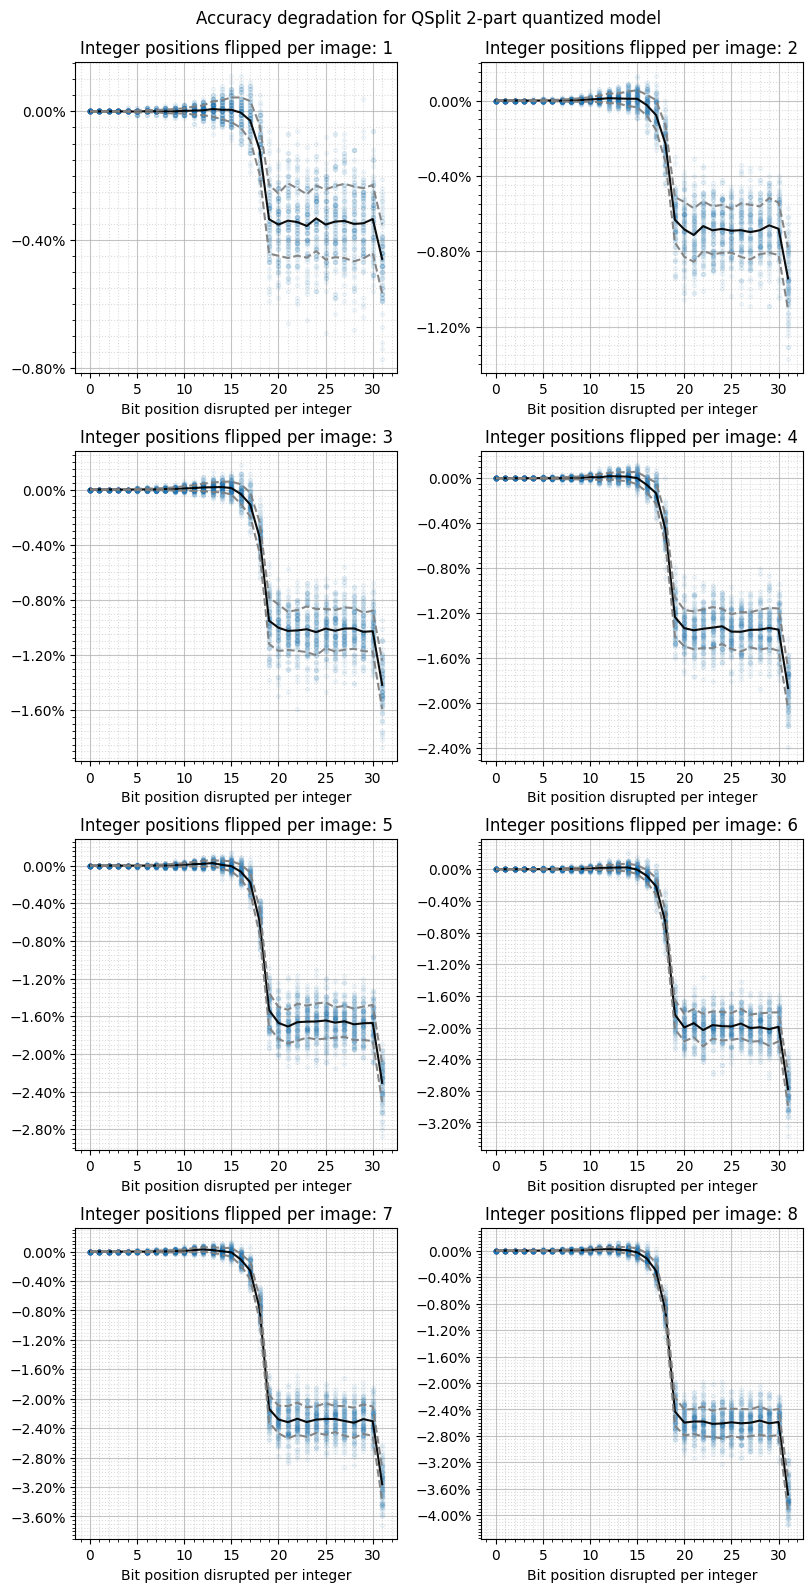

In [2]:
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_m2_quantized_2023-05-22.csv'
SAVE_NAME = 'QSplit Model-2 Quantized Accuracy.png'
N_FLIPS = 8
df = pd.read_csv(SAVE_DATA_PATH)

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(N_FLIPS//2, 2, figsize = (8, 16))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.96])
fig.suptitle('Accuracy degradation for QSplit 2-part quantized model')

for i in range(1, N_FLIPS + 1):
    ax[convert_position(i-1)].yaxis.set_major_formatter(ticker.PercentFormatter())
    condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i)
    ax[convert_position(i-1)].plot(df.loc[condition]['bit_disrupted'], pd.to_numeric(df.loc[condition]['q_aware_test_acc_degradation'])*100, '.', alpha = 0.05)
    ax[convert_position(i-1)].set_title('Integer positions flipped per image: ' + str(i))
    ax[convert_position(i-1)].set_xlabel('Bit position disrupted per integer')
    ax[convert_position(i-1)].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[convert_position(i-1)].yaxis.set_major_locator(ticker.MultipleLocator(0.4))
    ax[convert_position(i-1)].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax[convert_position(i-1)].yaxis.set_minor_locator(ticker.AutoMinorLocator(8)) 
    ax[convert_position(i-1)].grid(which='major', linestyle='-', alpha = 0.75)
    ax[convert_position(i-1)].grid(which='minor', linestyle=':', alpha = 0.45)
    averages = []
    stds = []
    for j in np.unique(df.loc[condition]['bit_disrupted']):
        new_condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i) & (df['bit_disrupted'] == j)
        averages.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_acc_degradation']).mean())
        stds.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_acc_degradation']).std())
    averages = np.array(averages)
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), averages*100, alpha = 0.95, color = 'k')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages + stds)*100, '--', alpha = 0.95, color = 'gray')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages - stds)*100, '--', alpha = 0.95, color = 'gray')

plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

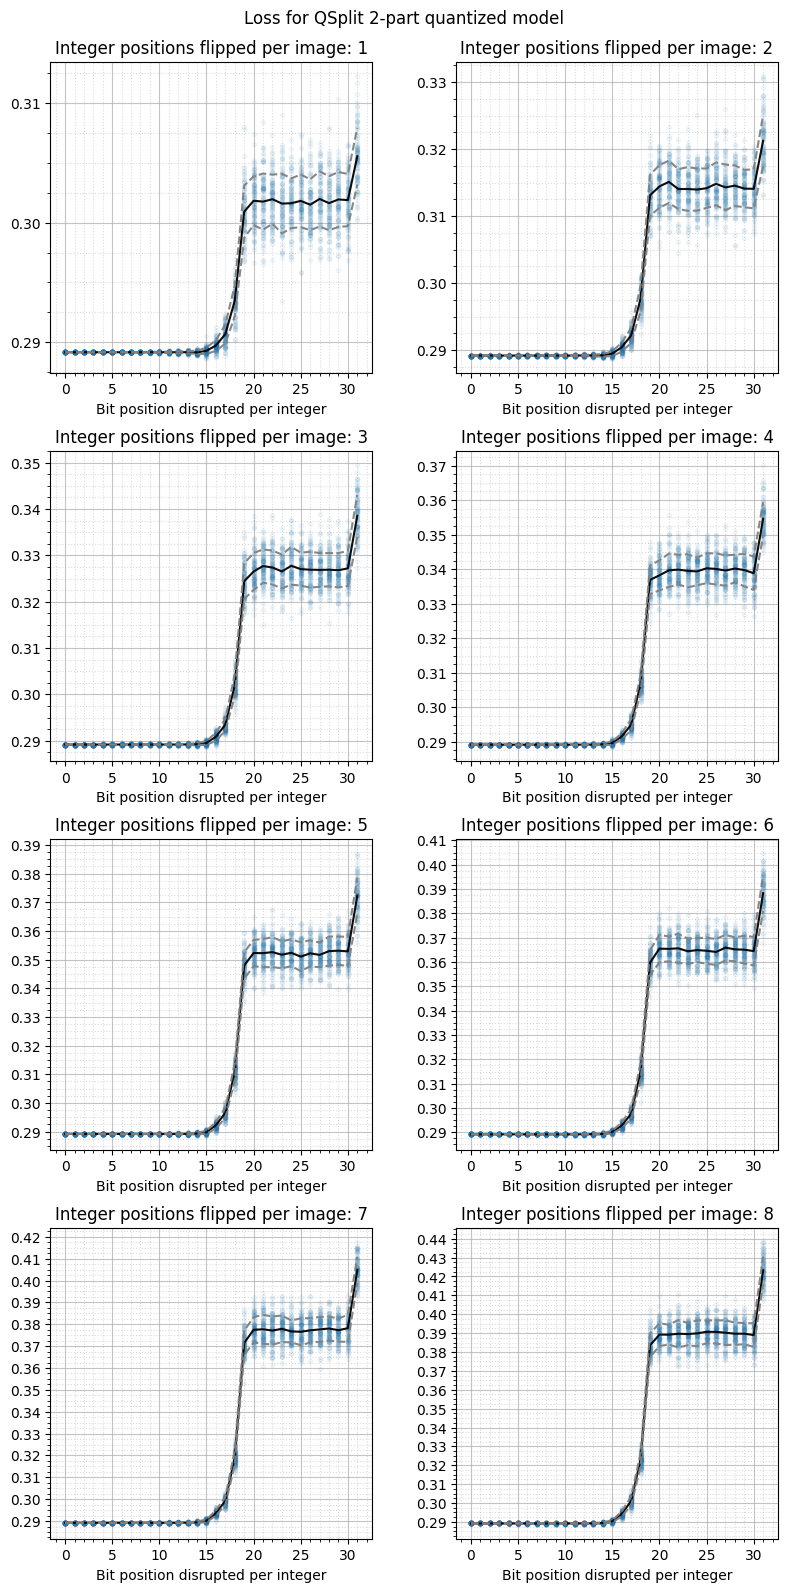

In [3]:
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_m2_quantized_2023-05-22.csv'
SAVE_NAME = 'QSplit Model-2 Quantized Loss.png'
N_FLIPS = 8
df = pd.read_csv(SAVE_DATA_PATH)

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(N_FLIPS//2, 2, figsize = (8, 16))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.96])
fig.suptitle('Loss for QSplit 2-part quantized model')

for i in range(1, N_FLIPS + 1):
    condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i)
    ax[convert_position(i-1)].plot(df.loc[condition]['bit_disrupted'], pd.to_numeric(df.loc[condition]['q_aware_test_loss']), '.', alpha = 0.05)
    ax[convert_position(i-1)].set_title('Integer positions flipped per image: ' + str(i))
    ax[convert_position(i-1)].set_xlabel('Bit position disrupted per integer')
    ax[convert_position(i-1)].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[convert_position(i-1)].yaxis.set_major_locator(ticker.MultipleLocator(0.01))
    ax[convert_position(i-1)].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax[convert_position(i-1)].yaxis.set_minor_locator(ticker.AutoMinorLocator(4)) 
    ax[convert_position(i-1)].grid(which='major', linestyle='-', alpha = 0.75)
    ax[convert_position(i-1)].grid(which='minor', linestyle=':', alpha = 0.45)
    averages = []
    stds = []
    for j in np.unique(df.loc[condition]['bit_disrupted']):
        new_condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i) & (df['bit_disrupted'] == j)
        averages.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_loss']).mean())
        stds.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_loss']).std())
    averages = np.array(averages)
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), averages, alpha = 0.95, color = 'k')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages + stds), '--', alpha = 0.95, color = 'gray')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages - stds), '--', alpha = 0.95, color = 'gray')

plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

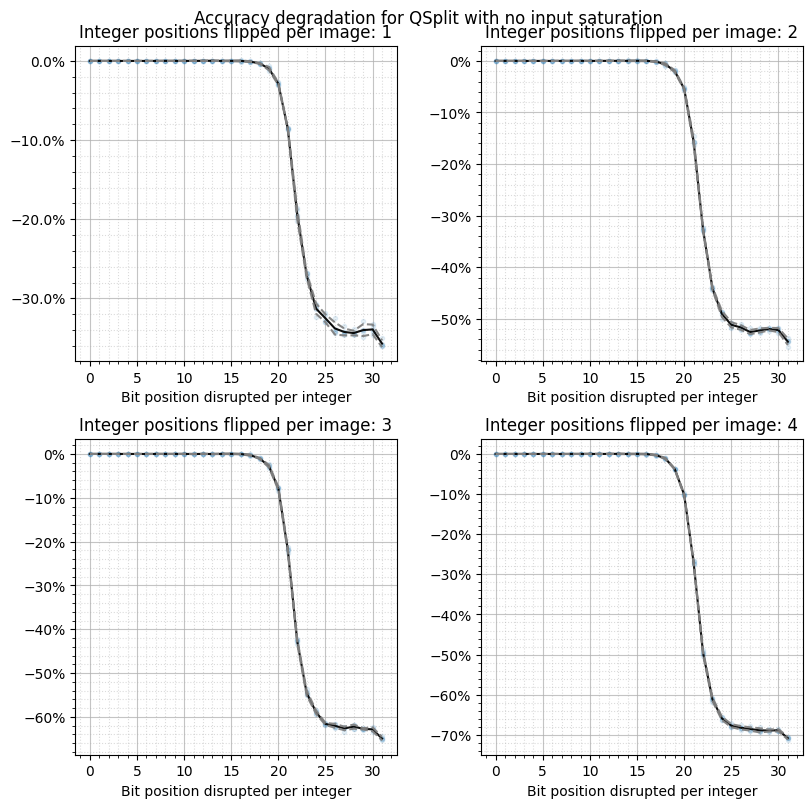

In [4]:
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_no_input_saturation_2023-06-29.csv'
# SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_no_input_saturation_2023-05-23.csv'
SAVE_NAME = 'QSplit No Input Saturation Accuracy 2023-06-29.png'
N_FLIPS = 4
df = pd.read_csv(SAVE_DATA_PATH)

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(N_FLIPS//2, 2, figsize = (8, 8))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.96])
fig.suptitle('Accuracy degradation for QSplit with no input saturation')

for i in range(1, N_FLIPS + 1):
    ax[convert_position(i-1)].yaxis.set_major_formatter(ticker.PercentFormatter())
    condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i)
    ax[convert_position(i-1)].plot(df.loc[condition]['bit_disrupted'], pd.to_numeric(df.loc[condition]['q_aware_test_acc_degradation'])*100, '.', alpha = 0.1)
    ax[convert_position(i-1)].set_title('Integer positions flipped per image: ' + str(i))
    ax[convert_position(i-1)].set_xlabel('Bit position disrupted per integer')
    ax[convert_position(i-1)].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[convert_position(i-1)].yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax[convert_position(i-1)].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax[convert_position(i-1)].yaxis.set_minor_locator(ticker.AutoMinorLocator(5)) 
    ax[convert_position(i-1)].grid(which='major', linestyle='-', alpha = 0.75)
    ax[convert_position(i-1)].grid(which='minor', linestyle=':', alpha = 0.45)
    averages = []
    stds = []
    for j in np.unique(df.loc[condition]['bit_disrupted']):
        new_condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i) & (df['bit_disrupted'] == j)
        averages.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_acc_degradation']).mean())
        stds.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_acc_degradation']).std())
    averages = np.array(averages)
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), averages*100, alpha = 0.95, color = 'k')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages + stds)*100, '--', alpha = 0.95, color = 'gray')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages - stds)*100, '--', alpha = 0.95, color = 'gray')


plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

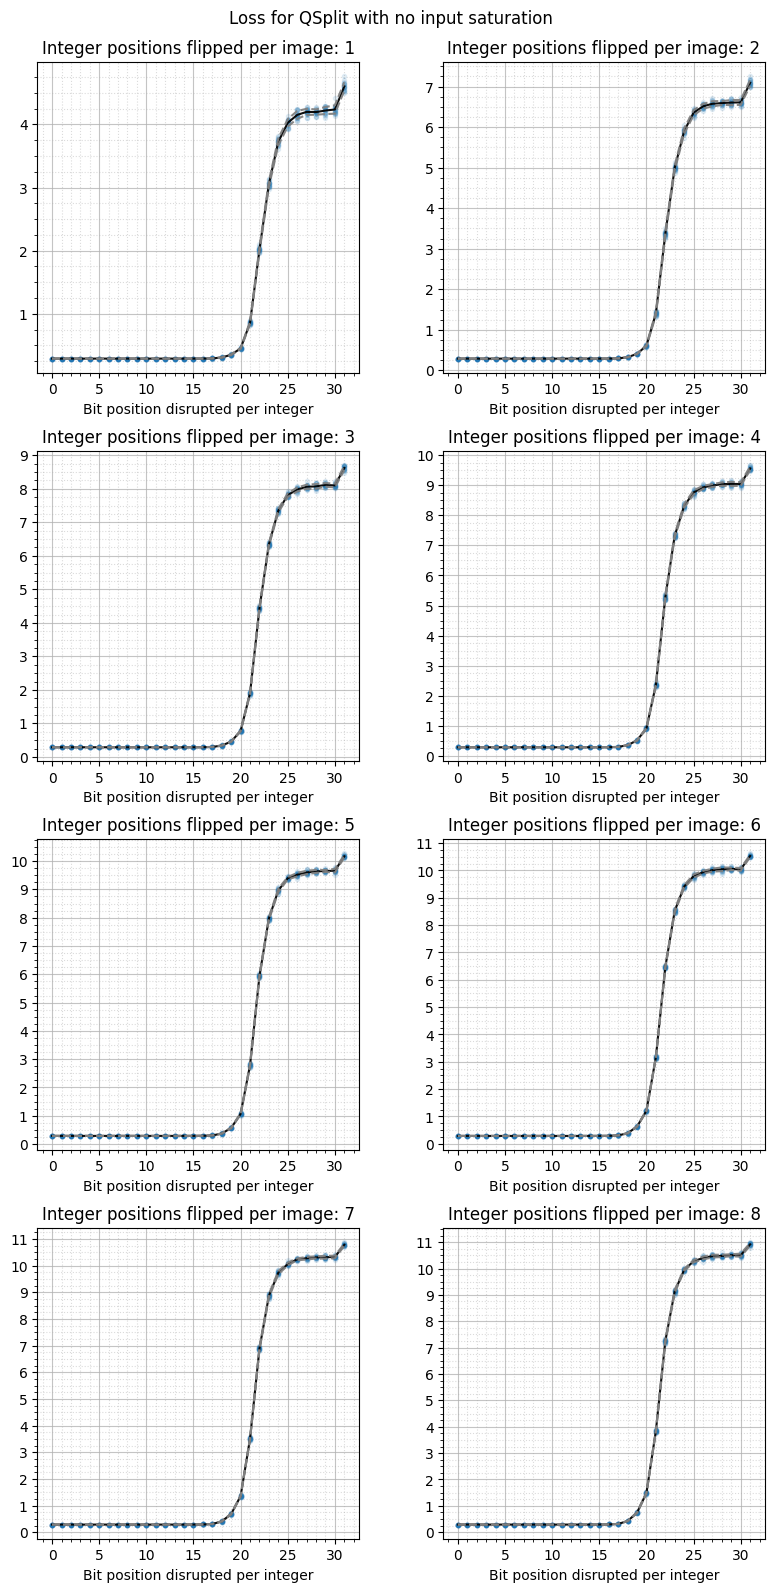

In [5]:
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_no_input_saturation_2023-05-23.csv'
SAVE_NAME = 'QSplit No Input Saturation Loss.png'
N_FLIPS = 8
df = pd.read_csv(SAVE_DATA_PATH)

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(N_FLIPS//2, 2, figsize = (8, 16))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.96])
fig.suptitle('Loss for QSplit with no input saturation')

for i in range(1, N_FLIPS + 1):
    condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i)
    ax[convert_position(i-1)].plot(df.loc[condition]['bit_disrupted'], pd.to_numeric(df.loc[condition]['q_aware_test_loss']), '.', alpha = 0.1)
    ax[convert_position(i-1)].set_title('Integer positions flipped per image: ' + str(i))
    ax[convert_position(i-1)].set_xlabel('Bit position disrupted per integer')
    ax[convert_position(i-1)].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[convert_position(i-1)].yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[convert_position(i-1)].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax[convert_position(i-1)].yaxis.set_minor_locator(ticker.AutoMinorLocator(4))  
    ax[convert_position(i-1)].grid(which='major', linestyle='-', alpha = 0.75)
    ax[convert_position(i-1)].grid(which='minor', linestyle=':', alpha = 0.45)
    averages = []
    stds = []
    for j in np.unique(df.loc[condition]['bit_disrupted']):
        new_condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i) & (df['bit_disrupted'] == j)
        averages.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_loss']).mean())
        stds.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_loss']).std())
    averages = np.array(averages)
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), averages, alpha = 0.95, color = 'k')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages + stds), '--', alpha = 0.95, color = 'gray')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages - stds), '--', alpha = 0.95, color = 'gray')

plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

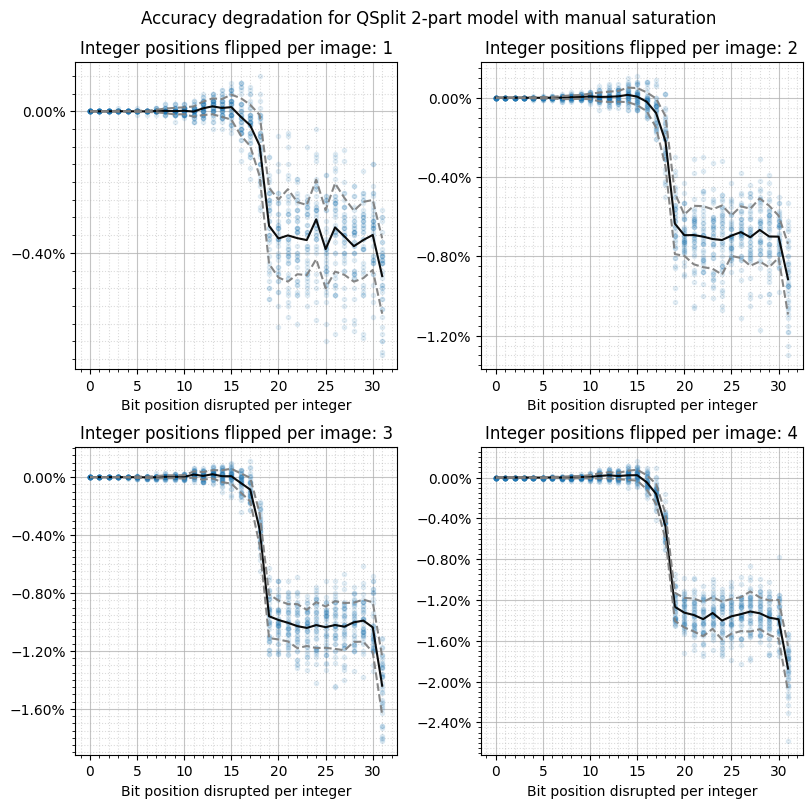

In [6]:
# Accuracy - Manual saturation
DATE = '2023-06-15'
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_manual_saturation_' + DATE + '.csv'
SAVE_NAME = 'QSplit Manual Saturation Accuracy ' + DATE + '.png'
N_FLIPS = 4
df = pd.read_csv(SAVE_DATA_PATH)

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(N_FLIPS//2, 2, figsize = (8, 8))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Accuracy degradation for QSplit 2-part model with manual saturation')

for i in range(1, N_FLIPS + 1):
    ax[convert_position(i-1)].yaxis.set_major_formatter(ticker.PercentFormatter())
    condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i)
    ax[convert_position(i-1)].plot(df.loc[condition]['bit_disrupted'], pd.to_numeric(df.loc[condition]['q_aware_test_acc_degradation'])*100, '.', alpha = 0.1)
    ax[convert_position(i-1)].set_title('Integer positions flipped per image: ' + str(i))
    ax[convert_position(i-1)].set_xlabel('Bit position disrupted per integer')
    ax[convert_position(i-1)].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[convert_position(i-1)].yaxis.set_major_locator(ticker.MultipleLocator(0.4))
    ax[convert_position(i-1)].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax[convert_position(i-1)].yaxis.set_minor_locator(ticker.AutoMinorLocator(8)) 
    ax[convert_position(i-1)].grid(which='major', linestyle='-', alpha = 0.75)
    ax[convert_position(i-1)].grid(which='minor', linestyle=':', alpha = 0.45)
    averages = []
    stds = []
    for j in np.unique(df.loc[condition]['bit_disrupted']):
        new_condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i) & (df['bit_disrupted'] == j)
        averages.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_acc_degradation']).mean())
        stds.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_acc_degradation']).std())
    averages = np.array(averages)
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), averages*100, alpha = 0.95, color = 'k')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages + stds)*100, '--', alpha = 0.95, color = 'gray')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages - stds)*100, '--', alpha = 0.95, color = 'gray')

plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

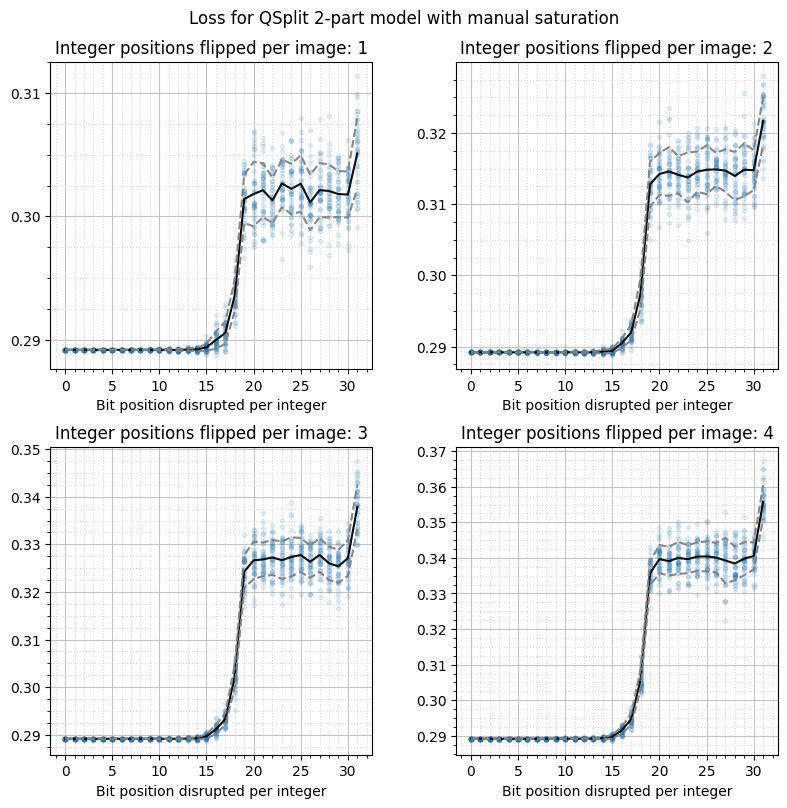

In [7]:
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_manual_saturation_2023-06-15.csv'
SAVE_NAME = 'QSplit Manual Saturation Loss.png'
N_FLIPS = 4
df = pd.read_csv(SAVE_DATA_PATH)

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(N_FLIPS//2, 2, figsize = (8, 8))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Loss for QSplit 2-part model with manual saturation')

for i in range(1, N_FLIPS + 1):
    condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i)
    ax[convert_position(i-1)].plot(df.loc[condition]['bit_disrupted'], pd.to_numeric(df.loc[condition]['q_aware_test_loss']), '.', alpha = 0.1)
    ax[convert_position(i-1)].set_title('Integer positions flipped per image: ' + str(i))
    ax[convert_position(i-1)].set_xlabel('Bit position disrupted per integer')
    ax[convert_position(i-1)].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[convert_position(i-1)].yaxis.set_major_locator(ticker.MultipleLocator(0.01))
    ax[convert_position(i-1)].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax[convert_position(i-1)].yaxis.set_minor_locator(ticker.AutoMinorLocator(4))  
    ax[convert_position(i-1)].grid(which='major', linestyle='-', alpha = 0.75)
    ax[convert_position(i-1)].grid(which='minor', linestyle=':', alpha = 0.45)
    averages = []
    stds = []
    for j in np.unique(df.loc[condition]['bit_disrupted']):
        new_condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i) & (df['bit_disrupted'] == j)
        averages.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_loss']).mean())
        stds.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_loss']).std())
    averages = np.array(averages)
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), averages, alpha = 0.95, color = 'k')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages + stds), '--', alpha = 0.95, color = 'gray')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages - stds), '--', alpha = 0.95, color = 'gray')

plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

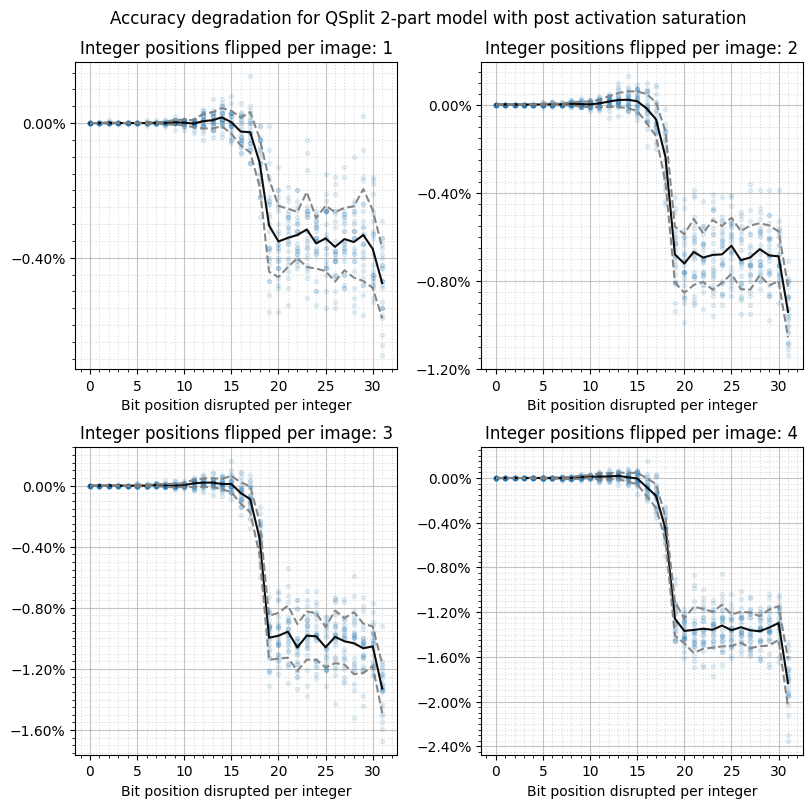

In [8]:
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_multi_relu_2023-06-18.csv'
SAVE_NAME = 'QSplit Post Activation Saturation Accuracy.png'
N_FLIPS = 4
df = pd.read_csv(SAVE_DATA_PATH)

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(N_FLIPS//2, 2, figsize = (8, 8))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Accuracy degradation for QSplit 2-part model with post activation saturation')

for i in range(1, N_FLIPS + 1):
    ax[convert_position(i-1)].yaxis.set_major_formatter(ticker.PercentFormatter())
    condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i)
    ax[convert_position(i-1)].plot(df.loc[condition]['bit_disrupted'], pd.to_numeric(df.loc[condition]['q_aware_test_acc_degradation'])*100, '.', alpha = 0.1)
    ax[convert_position(i-1)].set_title('Integer positions flipped per image: ' + str(i))
    ax[convert_position(i-1)].set_xlabel('Bit position disrupted per integer')
    ax[convert_position(i-1)].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[convert_position(i-1)].yaxis.set_major_locator(ticker.MultipleLocator(0.4))
    ax[convert_position(i-1)].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax[convert_position(i-1)].yaxis.set_minor_locator(ticker.AutoMinorLocator(8)) 
    ax[convert_position(i-1)].grid(which='major', linestyle='-', alpha = 0.75)
    ax[convert_position(i-1)].grid(which='minor', linestyle=':', alpha = 0.45)
    averages = []
    stds = []
    for j in np.unique(df.loc[condition]['bit_disrupted']):
        new_condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i) & (df['bit_disrupted'] == j)
        averages.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_acc_degradation']).mean())
        stds.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_acc_degradation']).std())
    averages = np.array(averages)
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), averages*100, alpha = 0.95, color = 'k')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages + stds)*100, '--', alpha = 0.95, color = 'gray')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages - stds)*100, '--', alpha = 0.95, color = 'gray')

plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

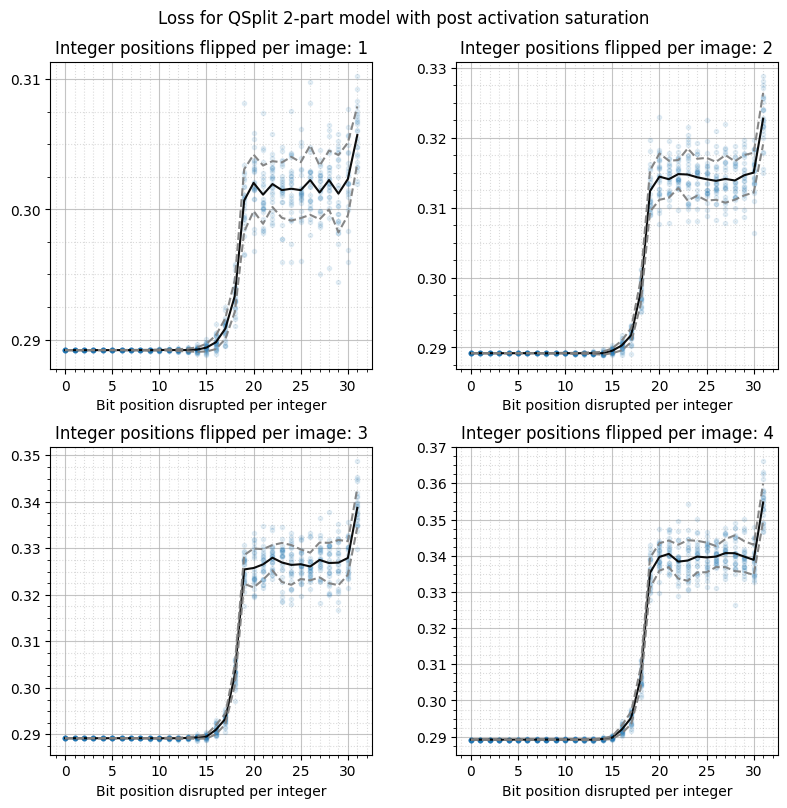

In [9]:
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_multi_relu_2023-06-18.csv'
SAVE_NAME = 'QSplit Post Activation Saturation Loss.png'
N_FLIPS = 4
df = pd.read_csv(SAVE_DATA_PATH)

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(N_FLIPS//2, 2, figsize = (8, 8))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Loss for QSplit 2-part model with post activation saturation')

for i in range(1, N_FLIPS + 1):
    condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i)
    ax[convert_position(i-1)].plot(df.loc[condition]['bit_disrupted'], pd.to_numeric(df.loc[condition]['q_aware_test_loss']), '.', alpha = 0.1)
    ax[convert_position(i-1)].set_title('Integer positions flipped per image: ' + str(i))
    ax[convert_position(i-1)].set_xlabel('Bit position disrupted per integer')
    ax[convert_position(i-1)].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[convert_position(i-1)].yaxis.set_major_locator(ticker.MultipleLocator(0.01))
    ax[convert_position(i-1)].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    ax[convert_position(i-1)].yaxis.set_minor_locator(ticker.AutoMinorLocator(4))  
    ax[convert_position(i-1)].grid(which='major', linestyle='-', alpha = 0.75)
    ax[convert_position(i-1)].grid(which='minor', linestyle=':', alpha = 0.45)
    averages = []
    stds = []
    for j in np.unique(df.loc[condition]['bit_disrupted']):
        new_condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == i) & (df['bit_disrupted'] == j)
        averages.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_loss']).mean())
        stds.append(pd.to_numeric(df.loc[new_condition]['q_aware_test_loss']).std())
    averages = np.array(averages)
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), averages, alpha = 0.95, color = 'k')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages + stds), '--', alpha = 0.95, color = 'gray')
    ax[convert_position(i-1)].plot(np.unique(df.loc[condition]['bit_disrupted']), (averages - stds), '--', alpha = 0.95, color = 'gray')

plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

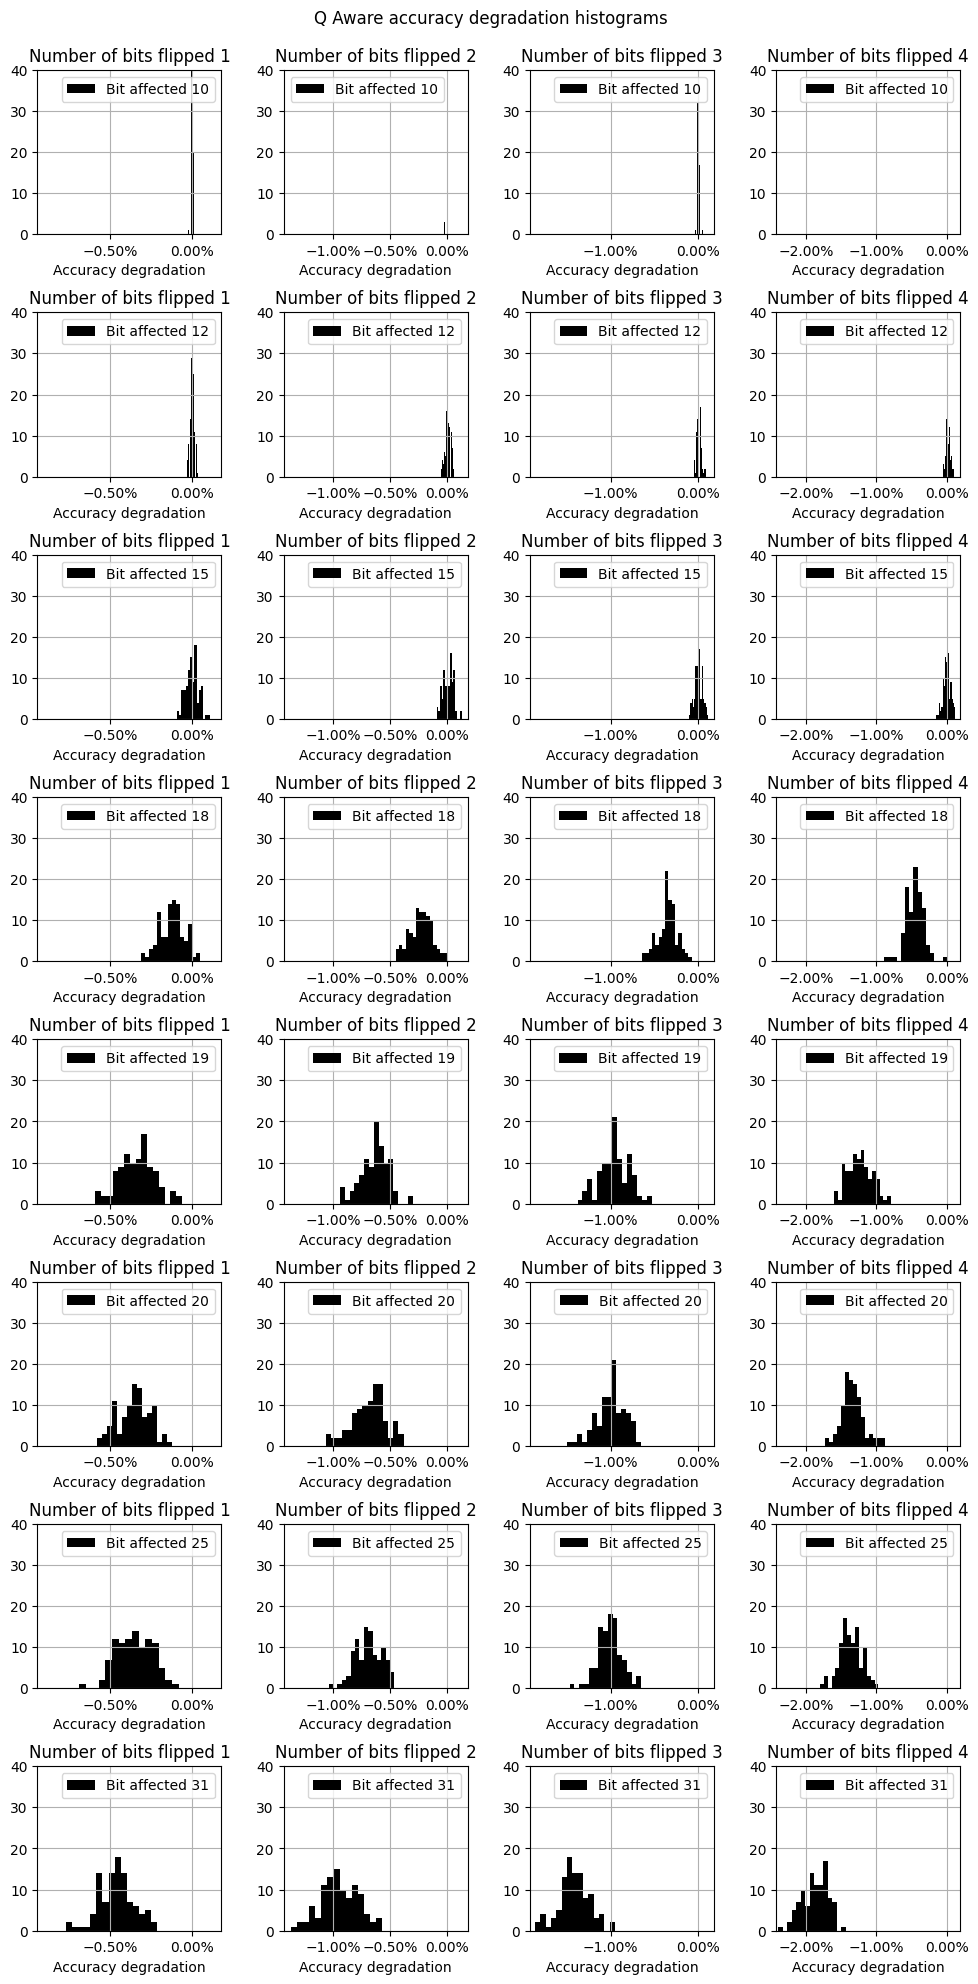

In [10]:
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_m2_quantized_2023-05-22.csv'
SAVE_NAME = 'QSplit Model-2 Accuracy degradation histogram.png'
N_FLIPS = 4

df = pd.read_csv(SAVE_DATA_PATH)

bits_list = [10,12,15,18,19,20,25,31]
N_GRAPHS = len(bits_list)
fig, ax = plt.subplots(N_GRAPHS, N_FLIPS, figsize = (10, 20))
fig.tight_layout(h_pad = 3.5, rect = [0, 0, 1, 0.96])
fig.suptitle('Q Aware accuracy degradation histograms')


for row in range(len(bits_list)):
    for column in range(N_FLIPS):
        ax[row,column].xaxis.set_major_formatter(ticker.PercentFormatter())
        condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == column + 1) & (df['bit_disrupted'] == bits_list[row])
        ax[row,column].hist(pd.to_numeric(df.loc[condition]['q_aware_test_acc_degradation'])*100, bins = 15, color = 'k')
        ax[row,column].set_xlabel('Accuracy degradation')
        ax[row,column].grid()
        ax[row,column].legend(['Bit affected ' + str(bits_list[row])])
        ax[row,column].set_title('Number of bits flipped ' + str(column + 1))
        ax[row,column].set_xlim([-0.452 - 0.492*(column + 1), 0.18 + .0025*(column + 1)])
        ax[row,column].set_ylim([0, 40])

plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

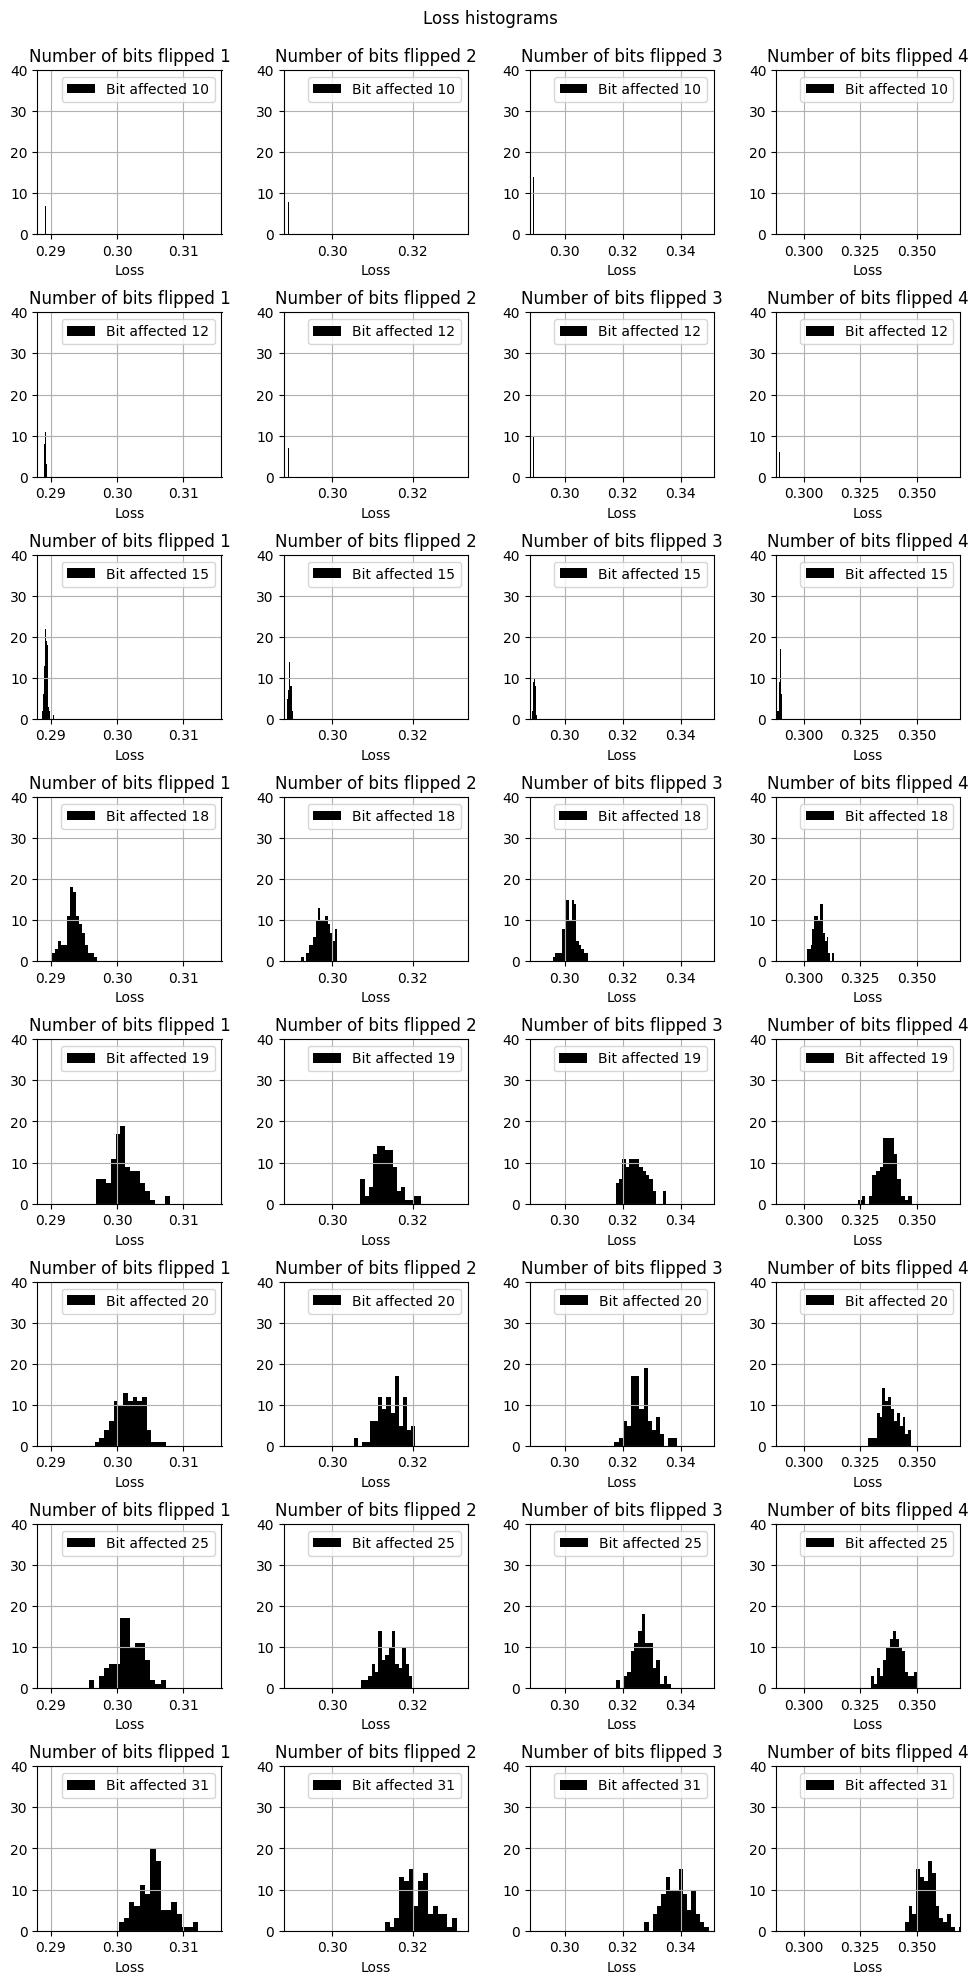

In [11]:
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_m2_quantized_2023-05-22.csv'
SAVE_NAME = 'QSplit Model-2 Loss histogram.png'
N_FLIPS = 4

df = pd.read_csv(SAVE_DATA_PATH)

bits_list = [10,12,15,18,19,20,25,31]
fig, ax = plt.subplots(N_GRAPHS, N_FLIPS, figsize = (10, 20))
fig.tight_layout(h_pad = 3.5, rect = [0, 0, 1, 0.96])
fig.suptitle('Loss histograms')

for row in range(len(bits_list)):
    for column in range(N_FLIPS):
        condition = (df['layer_key'].notna()) & (df['n_bits_flipped'] == column + 1) & (df['bit_disrupted'] == bits_list[row])
        ax[row,column].hist(pd.to_numeric(df.loc[condition]['q_aware_test_loss']), bins = 15, color = 'k')
        ax[row,column].set_xlabel('Loss')
        ax[row,column].grid()
        ax[row,column].legend(['Bit affected ' + str(bits_list[row])])
        ax[row,column].set_title('Number of bits flipped ' + str(column + 1))
        ax[row,column].set_xlim([0.288 - 2.8e-5*(column + 1), 0.298 + .0178*(column + 1)])
        ax[row,column].set_ylim([0, 40])

plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

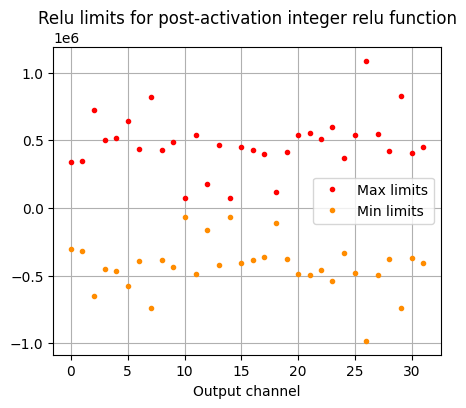

In [12]:
SAVE_DATA_PATH = OUTPUTS_DIR + 'QSplit_m2_quantized_2023-05-22.csv'
SAVE_NAME = 'Post activation Limits.png'

# Load Q Aware model
with tfmot.quantization.keras.quantize_scope():
    q_aware_model : Functional = tf.keras.models.load_model(LOAD_PATH_Q_AWARE)
q_model_info = Quantization.QuantizedModelInfo(q_aware_model)
import typing
index = 1
key = q_model_info.keys[index]
channels = q_model_info.output_shapes[key][-1]

fig, ax = plt.subplots(1, 1, figsize = (5, 4))
# fig.tight_layout(h_pad = 1.5, rect=[0, 0, 1, 0.93])
# fig.suptitle('Relu limits for pos activation integer relu function')

ax.set_title('Relu limits for post-activation integer relu function')
ax.plot(q_model_info.quantized_post_activ_max[key], '.', color = 'red', label = 'Max limits')
ax.plot(q_model_info.quantized_post_activ_min[key], '.', color = 'darkorange', label = 'Min limits')
ax.set_xlabel('Output channel')
ax.grid()
ax.legend()

plt.savefig(PLT_SAVE_PATH + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()